<a href="https://colab.research.google.com/github/OH1107/statistics/blob/master/training/chapter13/13%EC%9E%A5_%EB%B6%84%EB%A5%98%EC%98%88%EC%B8%A1%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 13장. 분류예측분석

- 관찰 개체들을 임의의 개수 집단으로 분류할 때 사용하는 분석기법

## 13.1 분류예측분석 기초
- 대부분의 종속변수는 명목형 척도
  - 이를 예측하기 위한 __선형판별분석, 로지스틱 회귀분석__

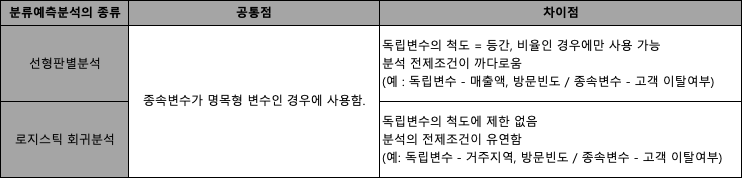

### 분류예측의 정확도 평가
- 결과에 대한 예측정확도 확인
  - 목표 집단으로 예측된 관측치와 실제 해당 집단에 속한 관측치가 정리된 분류행렬표 작성을 통해 평가

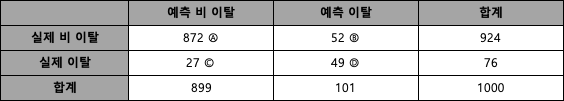

- 주어진 분류행렬표를 통해 예측정확도 평가
  - 모형 정확도
  - 양성 정확도
  - 음성 정확도
  - 민감도
  - 특이도

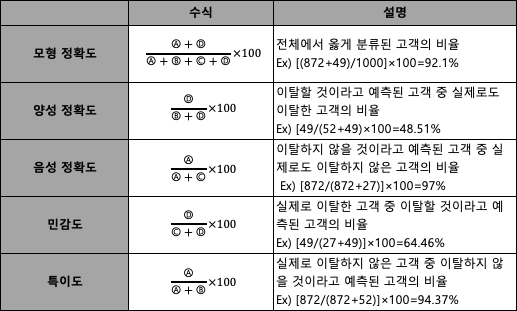

## 13.2 선형판별분석
- 이미 분류되어 있는 집단 사이의 차이를 설명하는 독립변수 검증
- 이런 변수들의 선형결합으로 이루어진 __판별식 또는 판별함수__를 통해 집단 분류 예측하는 기법

### [1] 개념 및 주요 이론
- 독립변수가 등간, 비율척도로만 구성되어야 한다는 제약조건
  - 이러한 몇 가지 전제조건이 갖춰진 상황에서는 우수한 판별력을 보임

#### 선형판별식
- 두 개 이상의 집단을 구분하는데 있어 분류오류를 최소화하는 독립변수들의 함수적 선형결합모형을 의미

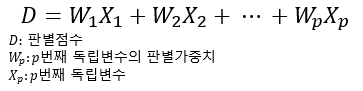

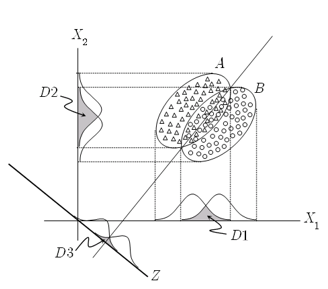

- 두 개의 집단 A, B 존재
  - X₁과 X₂를 이용하여 그룹 A와 B를 효과적으로 분류하기 어렵다.
  - 그러나 X₁과 X₂를 이용하여 Z라는 새로운 차원을 생성
    - 훨씬 효과적인 분류 가능할 것
- 즉, 선형판별분석은 개별독립변수들의 조합으로 주어진 __집단을 효과적으로 분류할 수 있는 새로운 가상의 축 (기준)을 형성__하는 과정

- 그러나 실제로, 집단을 나누는 하나의 판별식을 도출하는 것이 아닌, __각 집단에 적용되는 판별식을 각각 도출, 판별식에 의한 판별점수를 비교하여 집단을 분류__
  - 예 : 집단 A에 해당하는 판별식과 집단 B에 해당하는 판별식을 각각 만듦
  - 한 사례(예: 고객)에 대해 두 개의 판별점수를 도출
  - A 판별점수가 B 판별점수보다 클 경우 A 집단으로 판별

#### 선형판별분석을 위한 전제조건

① 독립변수는 정규분포를 따라야 한다.  
- 독립변수가 정규성을 띄지 않는 경우, 선형판별식의 예측 정확도가 낮을뿐만 아니라, 분석모형 자체가 유의하게 나오지 않는 경우가 많음  

② 종속변수와 독립변수는 상관관계를 가져야 한다.  
- 회귀분석과 마찬가지로 종속변수와 독립변수간의 상관관계가 존재한다는 가정에서 출발  

③ 독립변수들 사이에 상관관계가 없거나 작아야 한다.  
- 다중회귀분석과 마찬가지로 다중공선성의 문제가 발생하므로 독립변수간 상관관계는 없거나 작아야 함  

④ 종속변수로 구분되는 각 집단 별 공분산 행렬이 유사해야 한다.  
- 집단을 예측하는 분석이므로 공분산 행렬이 큰 집단이 판별모형에 영향을 많이 주게 됨
- 따라서 각 집단의 공분산 행렬이 비슷해야 더 좋은 분석결과를 얻을 수 있음

- 그러나, 실제 데이터는 정규분포를 따르지 않거나, 집단간 공분산 행렬이 유사하지 않는 경우가 많다.
  - 이 때문에 실제 데이터 분석가 입장에서는 로지스틱 회귀분석이나 의사결정나무 분석을 선호하는 경향이 큼

### [2] 분석 및 해석
- 쇼핑몰은 고객이탈을 효과적으로 예측하고자 고객들의 거래이력 데이터 활용
- 독립변수 = 방문빈도, 1회 평균매출액, 거래기간
- 귀무가설 = 방문빈도와 1회 평균매출액, 거래기간은 이탈에 영향을 주지 않는다
- 연구가설 = 방문빈도와 1회 평균매출액, 거래기간은 이탈에 영향을 준다

In [1]:
# 1. 모듈 및 데이터 탑재
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/statistics/data/Ashopping.csv',sep=',',encoding='CP949')
df.head()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,6,6,1,4,1079,0,5,7,7,3,4,6,5,6,7,7,6,7.0,6.0,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,4,4,1,1,537,0,2,3,2,3,3,2,5,4,6,7,6,6.0,NaN,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,6,6,1,6,1080,0,6,6,7,3,2,4,6,7,6,7,6,7.0,NaN,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,5,5,1,6,1019,0,3,5,7,3,5,3,5,5,6,6,6,5.0,6.0,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,6,6,0,6,1086,0,5,6,7,6,7,5,6,6,5,6,6,5.0,6.0,5,6,6,6,5,5,6,6,5,6


In [2]:
# 2. 종속변수와 독립변수 구분하기
X=df[['방문빈도','1회_평균매출액','거래기간']]
Y=df[['이탈여부']]

In [3]:
# 3. 선형판별분석
lda=LDA().fit(X,Y) #독립변수, 종속변수

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
# 4. 예측결과
print('판별식 선형계수 : ', np.round(lda.coef_,3))
print('\n판별식 절편 : ', np.round(lda.intercept_,3))
print('\n예측결과 : \n', pd.DataFrame(lda.predict(X)))
print('\n예측스코어 : \n', pd.DataFrame(lda.predict_proba(X)))
print('\n에측 정확도 :',lda.score(X, Y))

판별식 선형계수 :  [[ 0.086  0.    -0.096]]

판별식 절편 :  [72.916]

예측결과 : 
      0
0    0
1    1
2    0
3    0
4    0
..  ..
995  0
996  0
997  0
998  0
999  0

[1000 rows x 1 columns]

예측스코어 : 
                 0             1
0    1.000000e+00  2.208135e-13
1    1.370801e-10  1.000000e+00
2    1.000000e+00  1.999582e-13
3    1.000000e+00  7.951807e-11
4    1.000000e+00  1.309479e-11
..            ...           ...
995  1.000000e+00  2.283614e-12
996  1.000000e+00  1.727200e-10
997  1.000000e+00  3.609038e-14
998  1.000000e+00  8.248046e-13
999  1.000000e+00  6.555998e-13

[1000 rows x 2 columns]

에측 정확도 : 0.986


In [8]:
# 5. 분류행렬표 출력
cf_m=pd.DataFrame(confusion_matrix(Y, lda.predict(X)))
cf_m.columns=['예측 0','예측 1']
cf_m.index=['실제 0','실제 1']
print('\n분류행렬표\n')
cf_m


분류행렬표



,예측 0,예측 1
실제 0,921,12
실제 1,2,65


- 선형판별식
  - D = 72.916 + (8.57912496e-02 * 방문빈도) + (1.02380000e-06 * 1회 평균매출액) - (9.61603449e-02 * 거래기간)